## Limitations of Perceptron Without Loss Functions

When writing a perceptron from scratch without using loss functions, the process has some fundamental limitations:

- **Randomness Causes Infinite Possible Outputs:**  
  Because the weights are updated based on random samples and simple step functions, the model can keep changing in many directions. This randomness means the algorithm may produce an **infinite number of possible decision boundaries** without ever settling on the optimal one.

- **Optimal Decision Boundary Cannot Be Found Reliably:**  
  Without a guiding measure of error or "how wrong" the current boundary is, there is no clear path to improve the model efficiently. The perceptron might cycle endlessly and fail to find the best separation line, especially if the data is complex.

Without loss functions, the perceptron model can get stuck trying many random lines without finding the best decision boundary. Loss functions guide the training by quantifying error, enabling more effective learning and better prediction performance across various data types and tasks.



## How Perceptron Calculates Error

- The perceptron **does not compute the perpendicular distance** from a point to the decision boundary line.

- Instead, it substitutes the point coordinates directly into the line equation and uses the **sign of this value** to decide the class.

- This method simplifies computation but does not measure how far the point is from the decision boundary, only on which side it lies.

- Weight updates aim to move the decision boundary to better separate classes based on these sign-based errors.
 
The perceptron uses the weighted sum as a proxy for error, not the geometric distance to the line, making the calculation simple but less informative about misclassification severity.


In scikit-learn's Perceptron class, the loss function used is the perceptron loss, which is equivalent to the hinge loss with a fixed margin of 1.                Specifically, the Perceptron class is implemented as a specialized case of SGDClassifier where the loss parameter is set to "perceptron". 
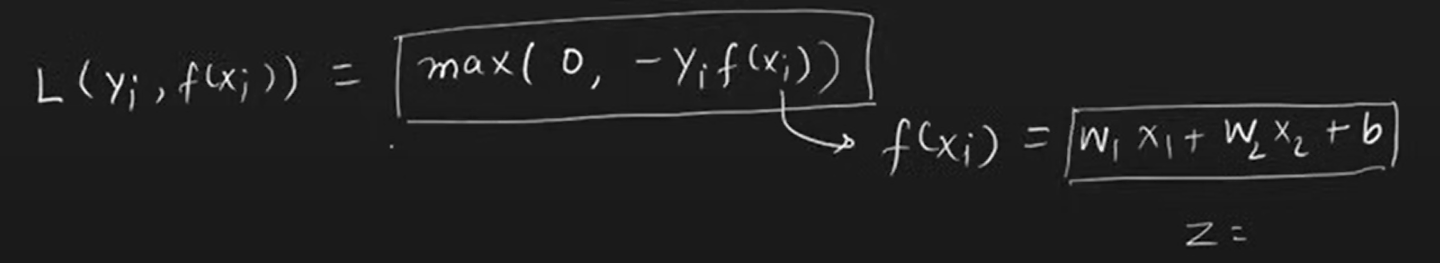
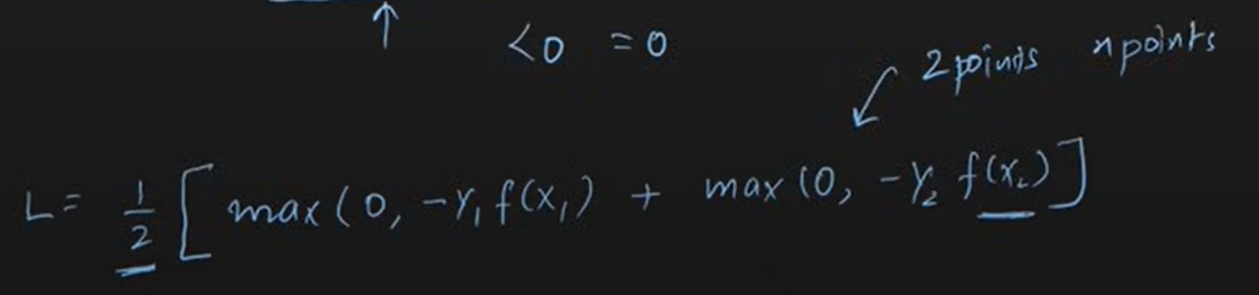

## Common Loss Functions and Their Uses

| Loss Function         | Use Case                               | Description                                                     |
|----------------------|--------------------------------------|-----------------------------------------------------------------|
| **Hinge Loss**        | Binary classification, Linear SVM    | Encourages a margin between classes, improving generalization.  |
| **Perceptron Loss**   | Simple perceptron updates             | Penalizes misclassifications, but no margin or probability info.|
| **Logistic Loss**     | Binary classification with probabilities | Smooth, probabilistic output; foundation of logistic regression.|
| **Cross-Entropy Loss**| Multi-class classification            | Generalization of logistic loss; works with softmax activation.|
| **Mean Squared Error**| Regression tasks                      | Measures average squared difference between predicted and true values.|

Loss function needs to be minimized. So we need to differentiate it:
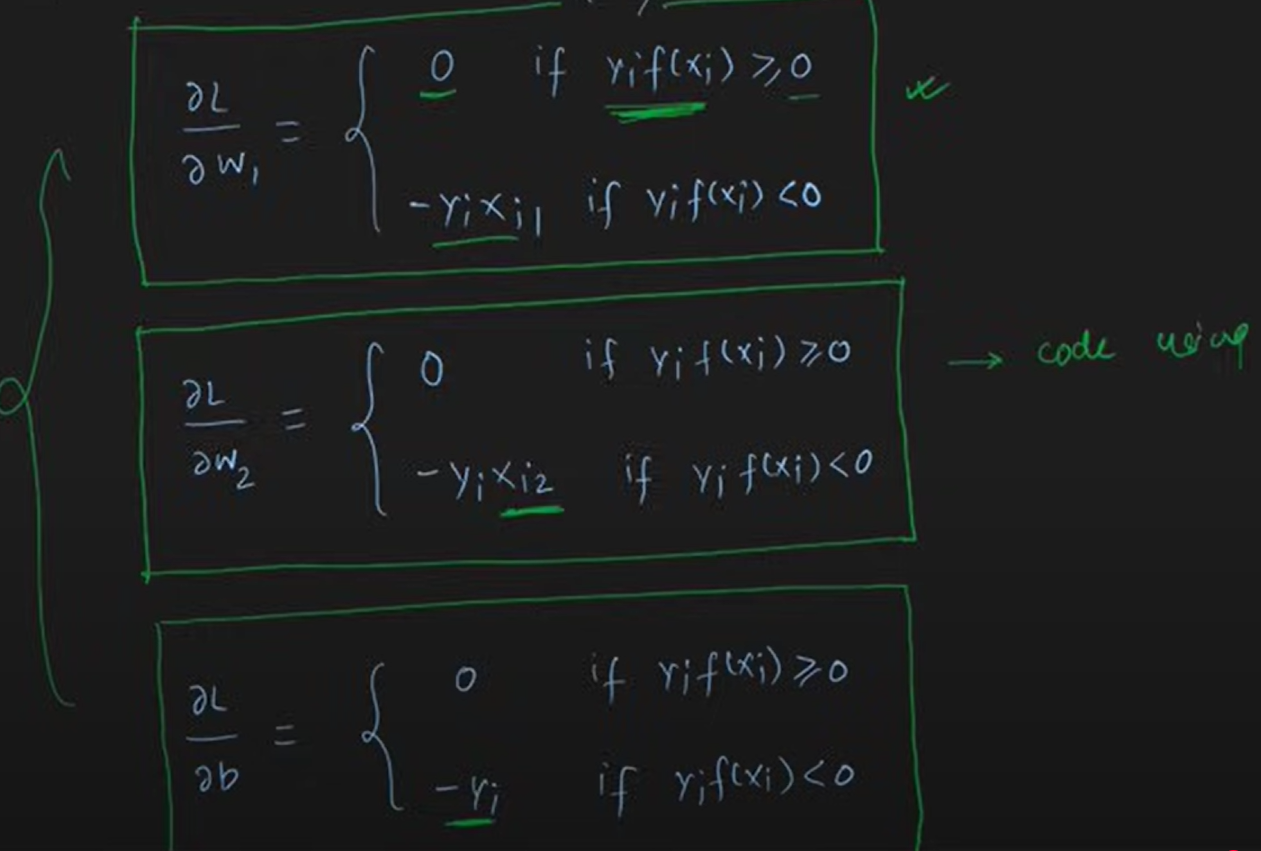

The implicit loss function used here is called the **perceptron loss**.

- The update rule activates only when \( z * y[i] < 0 \), meaning the point is misclassified.
- This loss function does **not** measure the distance or margin; it only checks whether the classification is incorrect.

The perceptron loss penalizes only misclassifications:
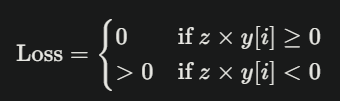

Weights are updated to correct errors, so no explicit numerical loss is calculated—only a check for whether each prediction is right or wrong.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[2, 3], [1, 1], [2, 1], [-1, -1], [-2, -3], [-3, -2]])
y = np.array([1, 1, 1, -1, -1, -1])

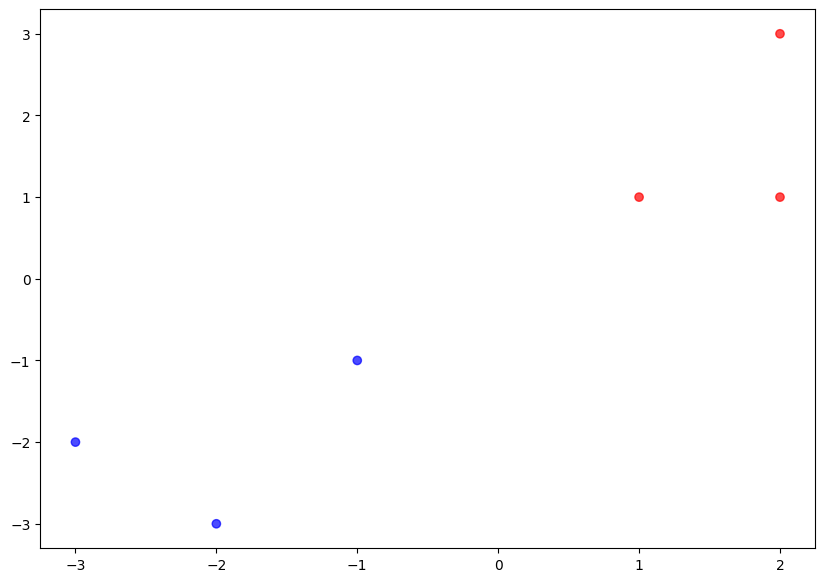

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.show()

In [13]:
def step(z):
    return 1 if z>0 else 0 
def perceptron_no_loss(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    learning_rate = 0.01
    
    for i in range(1000):
        j= np.random.randint(0,len(X))
        y_hat = step(np.dot(X[j],weights))
        error = y[j]-y_hat
        weights += learning_rate*error*X[j]
        
    return weights[0],weights[1:]

In [31]:
def perceptron_with_hinge_loss(X, y, lr=0.1, epochs=1000):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(epochs):
        for i in range(len(X)):
            z = np.dot(w, X[i]) + b
            loss = max(0, 1 - y[i] * z)
            if loss > 0:
                # gradient of hinge loss
                w += lr * y[i] * X[i]
                b += lr * y[i]
    return w, b

In [32]:
b1, w1 = perceptron_no_loss(X, y)
w2, b2 = perceptron_with_hinge_loss(X, y)

print("Weights without loss function:", w1, "Bias:", b1)
print("Weights with hinge loss:", w2, "Bias:", b2)

Weights without loss function: [10.62 10.32] Bias: -3.7299999999999653
Weights with hinge loss: [0.5 0.6] Bias: 0.0


In [33]:
m1 = -w1[0] / w1[1]
c1 = -b1 / w1[1]

m2 = -w2[0] / w2[1]
c2 = -b2 / w2[1]

x_plot = np.linspace(-4, 4, 100)
y_plot1 = m1 * x_plot + c1
y_plot2 = m2 * x_plot + c2

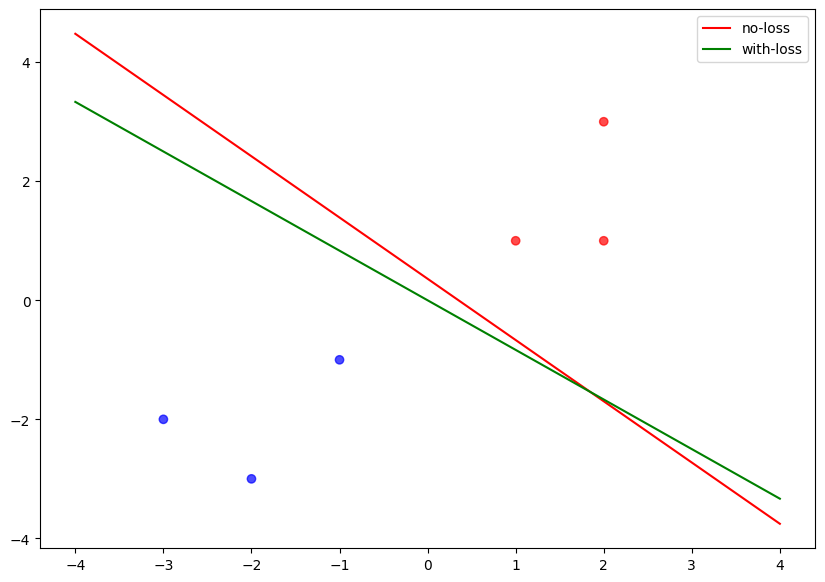

In [34]:
plt.figure(figsize=(10,7))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.plot(x_plot,y_plot1,'r-',label='no-loss')
plt.plot(x_plot,y_plot2,'g-',label='with-loss')
plt.legend()
plt.show()